# Récupération des données

In [0]:
import pandas

In [0]:
data_curiosity = pandas.read_csv("curiosity_progress.csv")
data_imitation = pandas.read_csv("imitation_progress.csv")

In [37]:
print(data_curiosity)

       advmean    advstd  best_ret  ...       eplen  eprooms  rewtotal
0     0.683727  0.267096      -inf  ...         NaN      NaN       NaN
1     0.348345  0.132403      -inf  ...         NaN      NaN       NaN
2     0.260758  0.131689       0.0  ...  305.400000      1.0       0.0
3     0.159339  0.137959       0.0  ...  305.400000      1.0       0.0
4     0.070630  0.123822       0.0  ...  342.285714      1.0       0.0
...        ...       ...       ...  ...         ...      ...       ...
1609 -0.007444  0.014051     100.0  ...  513.250000      1.0     100.0
1610 -0.007091  0.014298     100.0  ...  513.010000      1.0     100.0
1611  0.000659  0.019677     100.0  ...  516.210000      1.0     100.0
1612 -0.002093  0.015309     100.0  ...  513.860000      1.0     100.0
1613 -0.001268  0.012086     100.0  ...  512.060000      1.0     100.0

[1614 rows x 45 columns]


In [38]:
print(data_curiosity.columns)

Index(['advmean', 'advstd', 'best_ret', 'epcount', 'eprew', 'ev_ext', 'ev_int',
       'mem_available', 'n_rooms', 'n_updates', 'opt_approxkl', 'opt_auxloss',
       'opt_clipfrac', 'opt_ent', 'opt_featvar', 'opt_gradnorm', 'opt_maxfeat',
       'opt_maxkl', 'opt_pg', 'opt_tot', 'opt_vf', 'reset_counter',
       'retextmean', 'retextstd', 'retintmean', 'retintstd', 'rewintmax_norm',
       'rewintmax_unnorm', 'rewintmean_norm', 'rewintmean_unnorm',
       'rewintstd_unnorm', 'rooms', 'tcount', 'time_elapsed', 'tps',
       'vpredextmean', 'vpredextstd', 'vpredintmean', 'vpredintstd',
       'wait_policy_inference', 'wait_step', 'wait_update', 'eplen', 'eprooms',
       'rewtotal'],
      dtype='object')


In [39]:
print(data_imitation)

       advmean    advstd  best_ret  ...       eplen  eprooms  rewtotal
0     0.626833  0.242811      -inf  ...         NaN      NaN       NaN
1     0.263843  0.136405      -inf  ...         NaN      NaN       NaN
2     0.224296  0.146612       0.0  ...  278.666667     1.00       0.0
3     0.158311  0.136800       0.0  ...  361.857143     1.00       0.0
4     0.108997  0.131851       0.0  ...  361.857143     1.00       0.0
...        ...       ...       ...  ...         ...      ...       ...
3106  0.000363  0.009467     400.0  ...  433.050000     1.03    5100.0
3107  0.000013  0.008230     400.0  ...  433.330000     1.03    5100.0
3108  0.001431  0.009372     400.0  ...  408.740000     1.00    5100.0
3109 -0.000045  0.009768     400.0  ...  407.720000     1.00    5100.0
3110  0.000953  0.008589     400.0  ...  407.170000     1.00    5100.0

[3111 rows x 45 columns]


In [40]:
print(data_imitation.columns)

Index(['advmean', 'advstd', 'best_ret', 'epcount', 'eprew', 'ev_ext', 'ev_int',
       'mem_available', 'n_rooms', 'n_updates', 'opt_approxkl', 'opt_auxloss',
       'opt_clipfrac', 'opt_ent', 'opt_featvar', 'opt_gradnorm', 'opt_maxfeat',
       'opt_maxkl', 'opt_pg', 'opt_tot', 'opt_vf', 'reset_counter',
       'retextmean', 'retextstd', 'retintmean', 'retintstd', 'rewintmax_norm',
       'rewintmax_unnorm', 'rewintmean_norm', 'rewintmean_unnorm',
       'rewintstd_unnorm', 'rooms', 'tcount', 'time_elapsed', 'tps',
       'vpredextmean', 'vpredextstd', 'vpredintmean', 'vpredintstd',
       'wait_policy_inference', 'wait_step', 'wait_update', 'eplen', 'eprooms',
       'rewtotal'],
      dtype='object')


# Mise en forme graphique

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Simple plots

In [0]:
colors = sns.color_palette("colorblind")
marker = itertools.cycle(('+', '*', '.'))
datas = []
model_names = []

datas.append(data_curiosity)
model_names.append("Avec curiosité")

datas.append(data_imitation)
model_names.append("Avec imitation")
#here we can add other models to compare

relevant_columns = ["n_rooms", "eplen", "eprooms", "best_ret", "rewtotal"] #here we can add other column names to compare

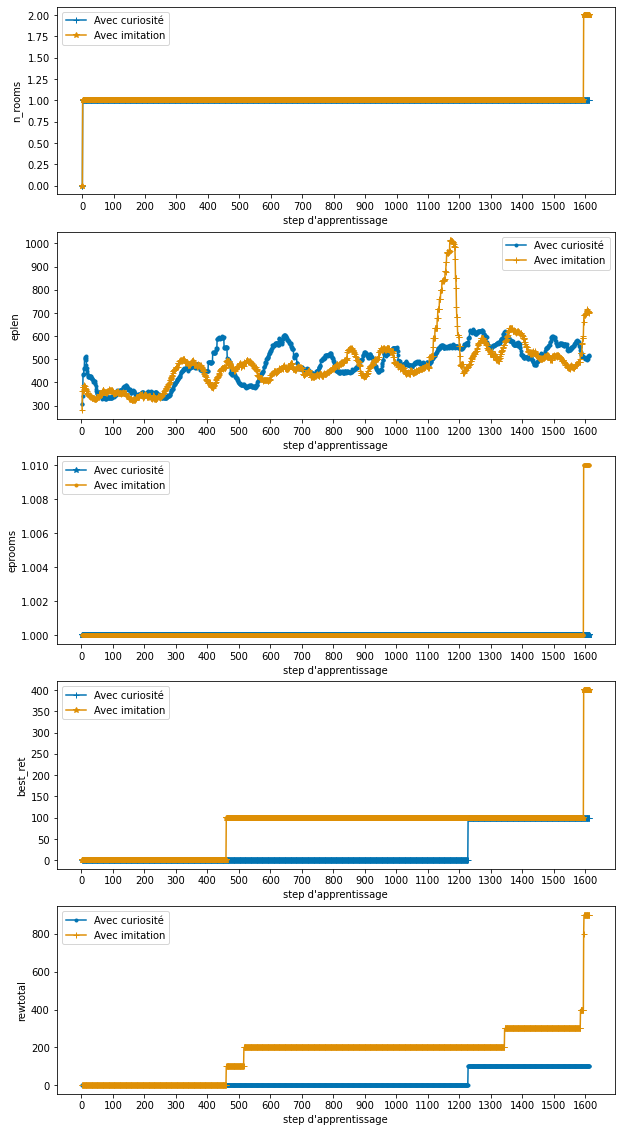

In [43]:
y_min = float("inf")
for data in datas:
  y_min = min(y_min, len(data.index))

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("step d'apprentissage")
  axs[i].set_xticks(np.arange(0, y_min, 100))
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas:
    axs[i].plot(data[relevant_columns[i]].head(y_min), color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

fig.savefig('curiosity_imitation.pdf')

## Plot of mean over n rows

In [0]:
#calculate mean over n rows
datas_mean = []
n = 200
for data in datas:
  datas_mean.append(data.groupby(np.arange(len(data))//n).mean())

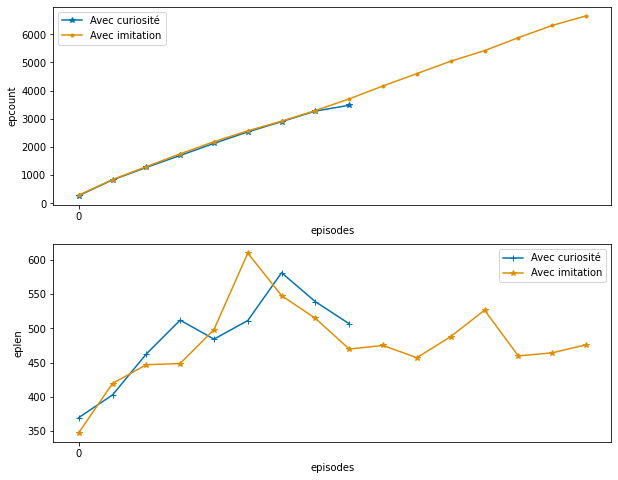

In [45]:
relevant_columns = ["epcount", "eplen"] #here we can add other column names to compare

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("episodes")
  axs[i].set_xticks(np.arange(0, y_max, 20))
  axs[i].set_xticklabels(np.arange(0, y_max, 20)*200)
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas_mean:
    axs[i].plot(data[relevant_columns[i]], color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

#fig.savefig('figure.pdf')

## Plot of max over n rows

In [0]:
#calculate mean over n rows
datas_max = []
n = 200
for data in datas:
  datas_max.append(data.groupby(np.arange(len(data))//n).max())

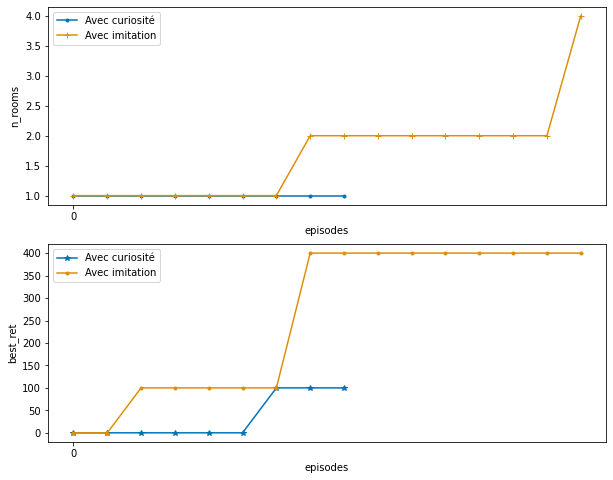

In [47]:
relevant_columns = ["n_rooms", "best_ret"] #here we can add other column names to compare

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("episodes")
  axs[i].set_xticks(np.arange(0, y_max, 20))
  axs[i].set_xticklabels(np.arange(0, y_max, 20)*200)
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas_max:
    axs[i].plot(data[relevant_columns[i]], color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

#fig.savefig('figure.pdf')

## Plot of couple of columns (mean, std)

In [0]:
#function to get lighter color
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

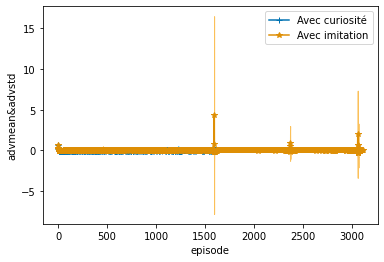

In [49]:
#plot mean and std
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

axs.set_xlabel("episode")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')

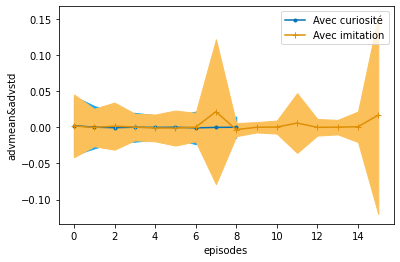

In [50]:
#plot mean and std (on mean values)
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

axs.set_xlabel("episodes")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas_mean:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')

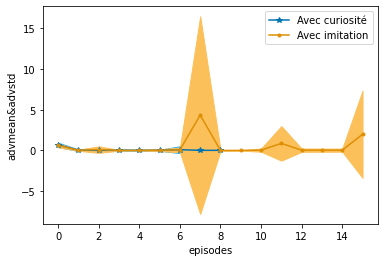

In [51]:
#plot mean and std (on max values)
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

axs.set_xlabel("episodes")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas_max:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')